In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Position liquidations analysis

## Histograms for liquidation fees, position size in USD

In [10]:
position_liquidations_df = pd.read_csv("position_liquidations.csv")
position_liquidations_df.drop(columns=["Unnamed: 0"], inplace=True)
position_liquidations_df

,tx_hash,trader,base_token,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number,timestamp,time
0,0xf29899730b11a5753acfd2aa76323a00cc5138bc0432...,0x98029c23e4a554989c280de7fcb1c2ededf2b17f,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0x5b3b3ed2bc7e643f6b558237e7c488e6b32eed80,48.873227,0.453003,1954.929064,571747,1638141748,2021-11-28 23:22:28
1,0x94eec0d2531abdd25a4114cff480dda1d42e1b5624af...,0x499166d1a71fed3b490ddb0591f4ae14c1031993,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0x4680cca73f815b583a201afef4b70451fb53b7af,138.828968,0.096288,5553.158726,572724,1638144236,2021-11-29 00:03:56
2,0x5dfcb2f5856e4df95701ac6142b20e7e491314119693...,0x35952141922ee99a04e016c967c3f0ad589ea958,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0x5b3b3ed2bc7e643f6b558237e7c488e6b32eed80,15.017667,0.010330,600.706678,573466,1638145638,2021-11-29 00:27:18
3,0xc8f54890f82e3b91f802c221765b025a8c119c498fbb...,0xd087966b4d2b1841c88b4d62b407d5ef1a465ac3,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0x5b3b3ed2bc7e643f6b558237e7c488e6b32eed80,121.233376,0.083333,4849.335035,573632,1638145930,2021-11-29 00:32:10
4,0x71bfc81fe97adc1e8d4f783ec56fd9fa6bc1d024602c...,0x35952141922ee99a04e016c967c3f0ad589ea958,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0x5b3b3ed2bc7e643f6b558237e7c488e6b32eed80,66.776190,0.608888,2671.047610,574411,1638147791,2021-11-29 01:03:11
...,...,...,...,...,...,...,...,...,...,...
2540,0x8523d14e61979f8f87b0c3569eaf8aab2ef3d9b01899...,0xfdfb146bff194e53661f18b9a1ffa60da9107d19,0x9482aafdced6b899626f465e1fa0cf1b1418d797,0xdcf93a1eacfe39f04e07c04cf7315412133c6167,0.019161,0.209677,0.766425,6521223,1651005360,2022-04-26 20:36:00
2541,0xed14065a5857d170d00e896bf69a8e13e45a52511599...,0x95f6acd42d85d699d2a8066d0237f13a9e82a29a,0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4,0x40fac6b96c112d1339e4243d856dc31ce2be2034,101.445011,320.067886,4057.800458,6530813,1651015372,2022-04-26 23:22:52
2542,0xd560824df8505cd433c4a5fca89c7297ccf4c209e14c...,0x00ccef1f2c02a986841a6eece88451be8f86958d,0x77d0cc9568605bfff32f918c8ffaa53f72901416,0x2f06b6fbd4ce2139e01a1bee7154b79f898c0dd4,10.841782,4333.852636,433.671287,6532058,1651016226,2022-04-26 23:37:06
2543,0x95e959c4b7a22d5bf3acaa3bb63e6542b7977c760f6c...,0xc0b2b0d1ed3d743f409b65821abfd0d249a46bce,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0xdcf93a1eacfe39f04e07c04cf7315412133c6167,0.191831,0.000196,7.673236,6579040,1651047633,2022-04-27 08:20:33


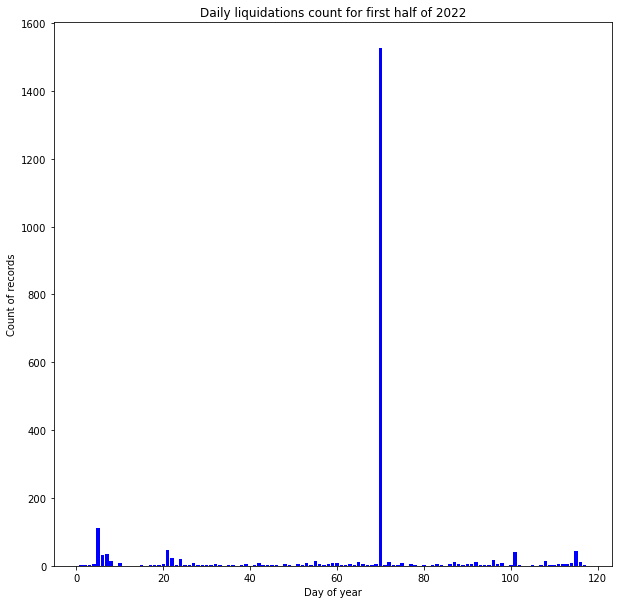

In [11]:
position_liquidations_df["time"] = pd.to_datetime(position_liquidations_df["timestamp"], unit='s')
position_liquidations_df["day_of_year"] = position_liquidations_df["time"].dt.dayofyear
daily_liquidations_count_df = position_liquidations_df[["day_of_year", "liquidation_fee"]].groupby("day_of_year").count()

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(daily_liquidations_count_df[daily_liquidations_count_df.index < 200].index,
      daily_liquidations_count_df[daily_liquidations_count_df.index < 200]["liquidation_fee"],
      color='b')
ax.set_xlabel("Day of year")
ax.set_ylabel("Count of records")
ax.set_title("Daily liquidations count for first half of 2022")
plt.show()

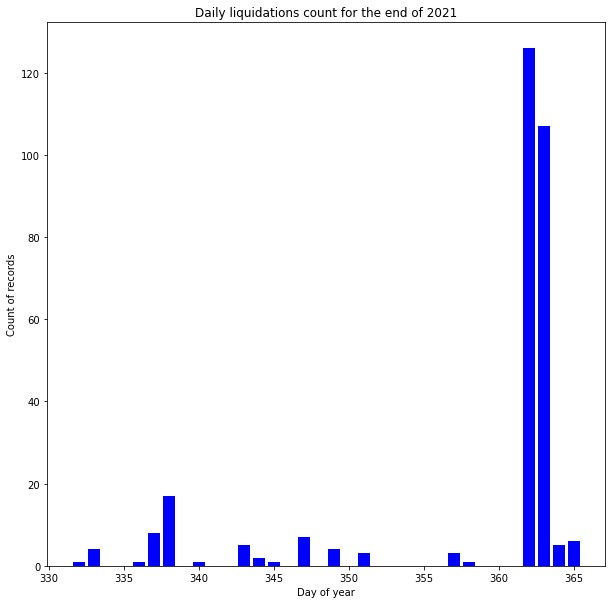

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(daily_liquidations_count_df[daily_liquidations_count_df.index > 300].index,
      daily_liquidations_count_df[daily_liquidations_count_df.index > 300]["liquidation_fee"],
      color='b')
ax.set_xlabel("Day of year")
ax.set_ylabel("Count of records")
ax.set_title("Daily liquidations count for the end of 2021")
plt.show()

In [13]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

position_liquidations_df["pool_name"] = position_liquidations_df["base_token"].replace(tokens_addresses_to_names_dict)

In [14]:
count_liquidations_df = position_liquidations_df[["pool_name", "liquidation_fee"]].groupby("pool_name").count()

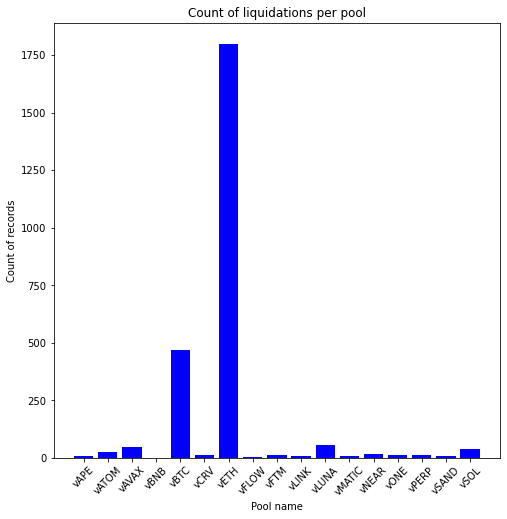

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(count_liquidations_df.index, count_liquidations_df["liquidation_fee"], color='b')
ax.set_xlabel("Pool name")
ax.set_ylabel("Count of records")
ax.set_title("Count of liquidations per pool")
plt.xticks(rotation=45)
plt.show()

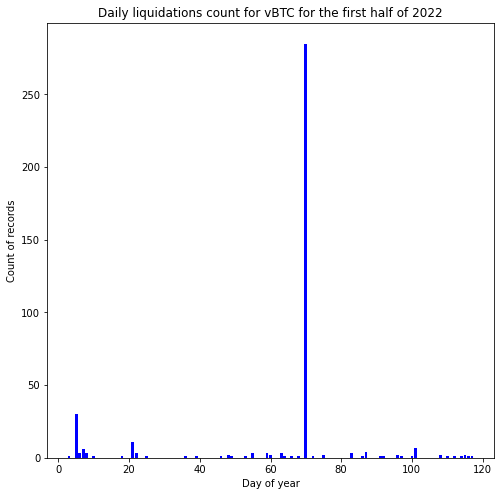

In [26]:
daily_liquidations_count_btc_df = position_liquidations_df[position_liquidations_df["pool_name"] == "vBTC"
                                                          ][["day_of_year", "liquidation_fee"]].groupby("day_of_year"
                                                                                                       ).count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(daily_liquidations_count_btc_df[daily_liquidations_count_btc_df.index < 200].index, 
      daily_liquidations_count_btc_df[daily_liquidations_count_btc_df.index < 200]["liquidation_fee"],
      color='b')
ax.set_xlabel("Day of year")
ax.set_ylabel("Count of records")
ax.set_title("Daily liquidations count for vBTC for the first half of 2022")
plt.show()

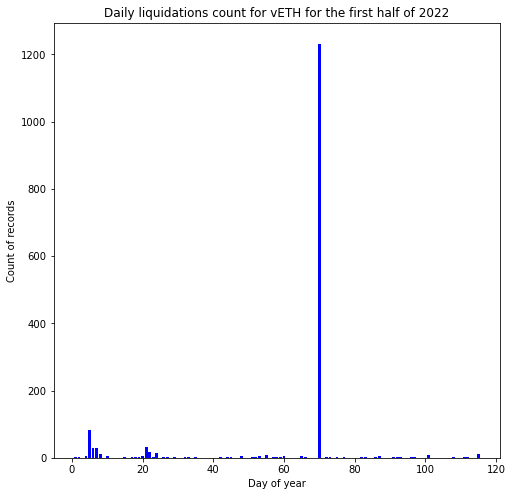

In [27]:
daily_liquidations_count_eth_df = position_liquidations_df[position_liquidations_df["pool_name"] == "vETH"
                                                          ][["day_of_year", "liquidation_fee"]].groupby("day_of_year"
                                                                                                       ).count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(daily_liquidations_count_eth_df[daily_liquidations_count_eth_df.index < 200].index, 
      daily_liquidations_count_eth_df[daily_liquidations_count_eth_df.index < 200]["liquidation_fee"],
      color='b')
ax.set_xlabel("Day of year")
ax.set_ylabel("Count of records")
ax.set_title("Daily liquidations count for vETH for the first half of 2022")
plt.show()

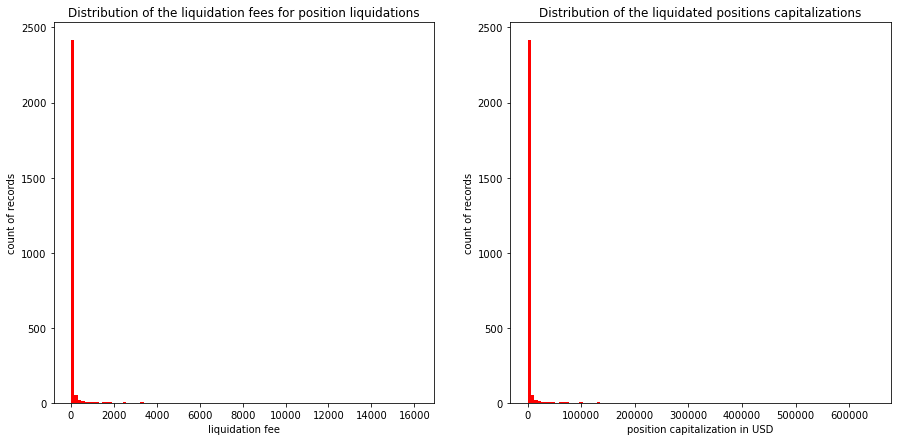

In [16]:
fig = plt.figure(figsize=(15, 7))

ax = fig.add_subplot(1, 2, 1)
ax.hist(position_liquidations_df["liquidation_fee"], bins=100, color='r')
ax.set_xlabel("liquidation fee")
ax.set_ylabel("count of records")
ax.set_title("Distribution of the liquidation fees for position liquidations")

ax = fig.add_subplot(1, 2, 2)
ax.hist(position_liquidations_df["position_notional_abs"], bins=100, color='r')
ax.set_xlabel("position capitalization in USD")
ax.set_ylabel("count of records")
ax.set_title("Distribution of the liquidated positions capitalizations")

plt.show()

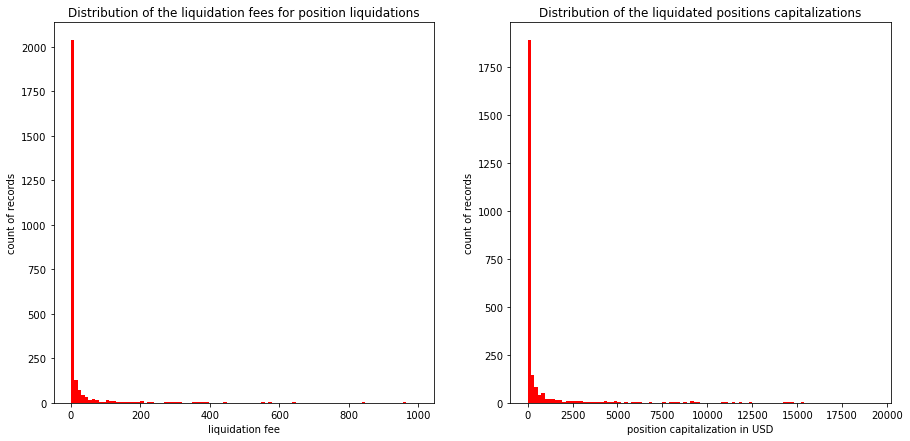

In [17]:
fig = plt.figure(figsize=(15, 7))

ax = fig.add_subplot(1, 2, 1)
ax.hist(position_liquidations_df[position_liquidations_df["liquidation_fee"] < 1000]
        ["liquidation_fee"], bins=100, color='r')
ax.set_xlabel("liquidation fee")
ax.set_ylabel("count of records")
ax.set_title("Distribution of the liquidation fees for position liquidations")

ax = fig.add_subplot(1, 2, 2)
ax.hist(position_liquidations_df[position_liquidations_df["position_notional_abs"] < 20000]
        ["position_notional_abs"], bins=100, color='r')
ax.set_xlabel("position capitalization in USD")
ax.set_ylabel("count of records")
ax.set_title("Distribution of the liquidated positions capitalizations")

plt.show()

# Position changes analysis

## Showing capitalization of applied changes overall, fees and realized pnl

In [18]:
position_changes_df = pd.read_csv("position_changes.csv")
position_changes_df.drop(columns=['Unnamed: 0'], inplace=True)
position_changes_df["time"] = pd.to_datetime(position_changes_df["timestamp"], unit='s')
position_changes_df["day_of_year"] = position_changes_df["time"].dt.dayofyear
position_changes_df["position_notional_after"] = (position_changes_df["position_size_after"] * 
                                                           position_changes_df["swapped_price"])
position_changes_df

,id,tx_hash,trader,base_token,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,from_function_signature,block_number_log_index,block_number,timestamp,time,day_of_year,position_notional_after
0,0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...,0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055019,-2997.000000,3.000000,-15000.000000,0.000000,0.275492,54472.154115,54448.103193,54491.778871,0xb6b1b6c3,515608004,515608,1638001140,2021-11-27 08:19:00,331,15006.625829
1,0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...,0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055098,-2997.000000,3.000000,-9000.000000,0.000000,0.165414,54393.697496,54408.885139,54413.308117,0xb6b1b6c3,515587004,515587,1638001140,2021-11-27 08:19:00,331,8997.487749
2,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.729828,-2997.000000,3.000000,-3000.000000,0.000000,0.729828,4106.445744,4110.556300,4108.035203,0xb6b1b6c3,515571005,515571,1638001140,2021-11-27 08:19:00,331,2997.000000
3,0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...,0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.728137,-2997.000000,3.000000,-12000.000000,0.000000,2.915928,4115.986193,4115.327606,4117.577498,0xb6b1b6c3,515594004,515594,1638001140,2021-11-27 08:19:00,331,12001.920393
4,0x548dd8a96b9faa92066283339832e380fd506f4ebc94...,0x548dd8a96b9faa92066283339832e380fd506f4ebc94...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.729264,-2997.000000,3.000000,-6000.000000,0.000000,1.459092,4109.624663,4112.146735,4111.214738,0xb6b1b6c3,515584004,515584,1638001140,2021-11-27 08:19:00,331,5996.320065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834858,0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...,0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...,0xbca93564bbf750e7b81ee1506009c7d86c6a4a45,0xb24f50dd9918934ab2228be7a097411ca28f6c14,-32.999902,3023.793838,3.023794,-14962.556823,-9.172361,162.961152,91.630389,91.816710,91.582076,0xb6b1b6c3,6651587008,6651587,1651138134,2022-04-28 09:28:54,118,14932.193775
1834859,0x1ec3f79f957587b332572447f288b15ad1196a7e760a...,0x1ec3f79f957587b332572447f288b15ad1196a7e760a...,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281,0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2,128.952896,-2594.732513,2.597330,8420.360981,-0.556983,-418.145904,20.121553,20.137375,20.132960,0xb6b1b6c3,6651597008,6651597,1651138149,2022-04-28 09:29:09,118,-8413.744901
1834860,0x5d9e91d0e0f32cfd68a39c001e3c1a3a77f7d629b48c...,0x5d9e91d0e0f32cfd68a39c001e3c1a3a77f7d629b48c...,0x4b4f526b450c75f3cb0e9aa0a0b5480e4b0c478a,0x151bb01c79f4516c233948d69dae39869bccb737,-25.872016,2596.910612,2.596911,7150.315804,0.000000,-71.290018,100.375270,100.298977,100.362358,0xb6b1b6c3,6651599007,6651599,1651138149,2022-04-28 09:29:09,118,-7155.754785
1834861,0x978645e43b1779dae628ed4df8a0350803d161c8fef1...,0x978645e43b1779dae628ed4df8a0350803d161c8fef1...,0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226,0xbe5de48197fc974600929196239e264ecb703ee8,3371.136364,-4297.643387,0.000000,85634.249350,-31.434297,-67667.741060,1.274835,1.265511,1.273833,0xcde109b6,6651595007,6651595,1651138149,2022-04-28 09:29:09,118,-86265.219936


In [19]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

position_changes_df["pool_name"] = position_changes_df["base_token"].replace(tokens_addresses_to_names_dict)

In [20]:
daily_grouped_position_changes_df = position_changes_df[["fee", "realized_pnl", "exchanged_position_notional", "day_of_year", "trader"]
                                                               ].groupby(["day_of_year"]).sum()
daily_grouped_position_changes_df

,fee,realized_pnl,exchanged_position_notional
day_of_year,,,
1,12758.587459,-28772.844170,-1.116291e+06
2,8690.955937,-25832.546974,-2.769623e+05
3,10542.327356,2061.281645,8.073887e+05
4,13192.596040,-20410.531829,-2.279675e+04
5,26413.407055,-356.422371,-5.149081e+05
...,...,...,...
361,4907.079626,-4768.791245,3.242395e+05
362,13553.394138,37351.800872,2.525037e+06
363,14315.344483,42901.354254,1.943345e+06


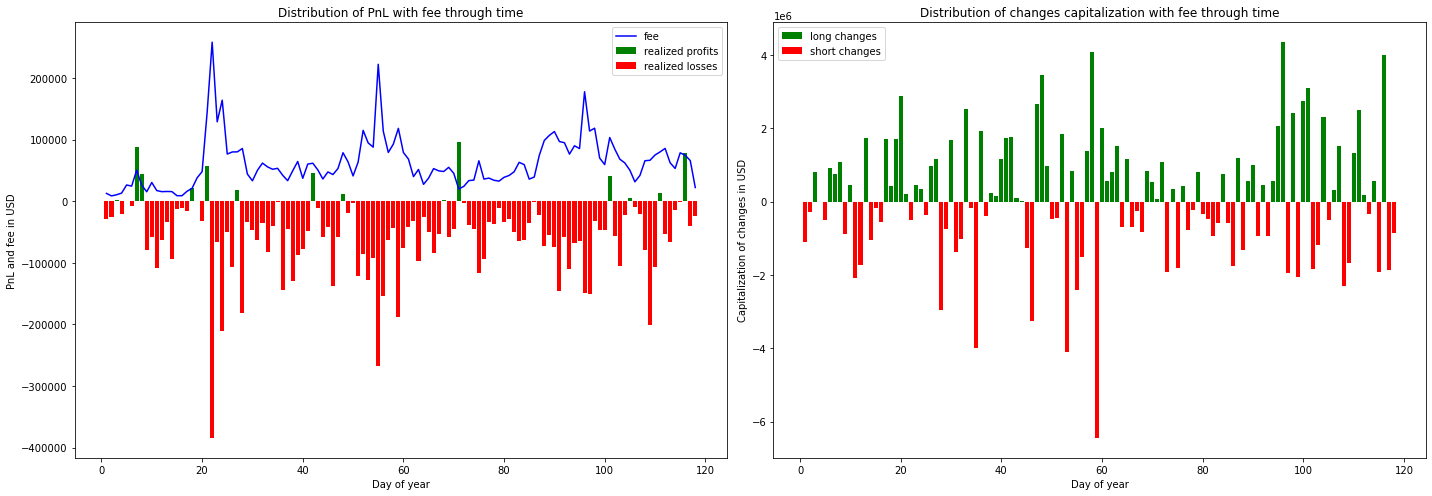

In [21]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot(1, 2, 1)
ax.plot(daily_grouped_position_changes_df[daily_grouped_position_changes_df.index < 200].index, 
        daily_grouped_position_changes_df[daily_grouped_position_changes_df.index < 200]["fee"],
        color='b', label='fee')
ax.bar(daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["realized_pnl"] > 0)].index, 
        daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["realized_pnl"] > 0)]["realized_pnl"],
        color='g', label='realized profits')
ax.bar(daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["realized_pnl"] < 0)].index, 
        daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["realized_pnl"] < 0)]["realized_pnl"],
        color='r', label='realized losses')
ax.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL and fee in USD")
ax.set_title("Distribution of PnL with fee through time")

ax = fig.add_subplot(1, 2, 2)
ax.bar(daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["exchanged_position_notional"] > 0)].index, 
        daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["exchanged_position_notional"] > 0)]["exchanged_position_notional"],
        color='g', label='long changes')
ax.bar(daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["exchanged_position_notional"] < 0)].index, 
        daily_grouped_position_changes_df[(daily_grouped_position_changes_df.index < 200) &
                                         (daily_grouped_position_changes_df["exchanged_position_notional"] < 0)]["exchanged_position_notional"],
        color='r', label='short changes')
ax.set_xlabel("Day of year")
ax.set_ylabel("Capitalization of changes in USD")
ax.legend()
ax.set_title("Distribution of changes capitalization with fee through time")

fig.tight_layout()
plt.show()

## Daily PnL and changes capitalization for each pool separately

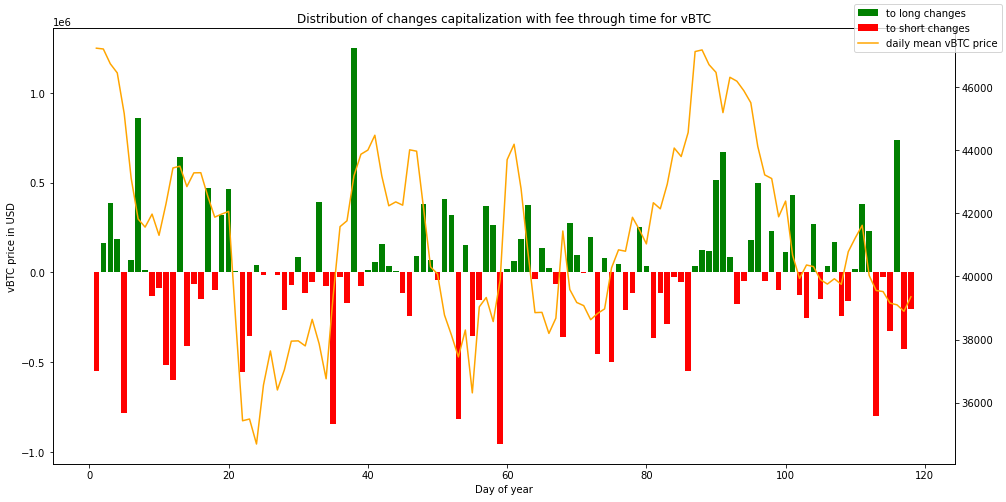

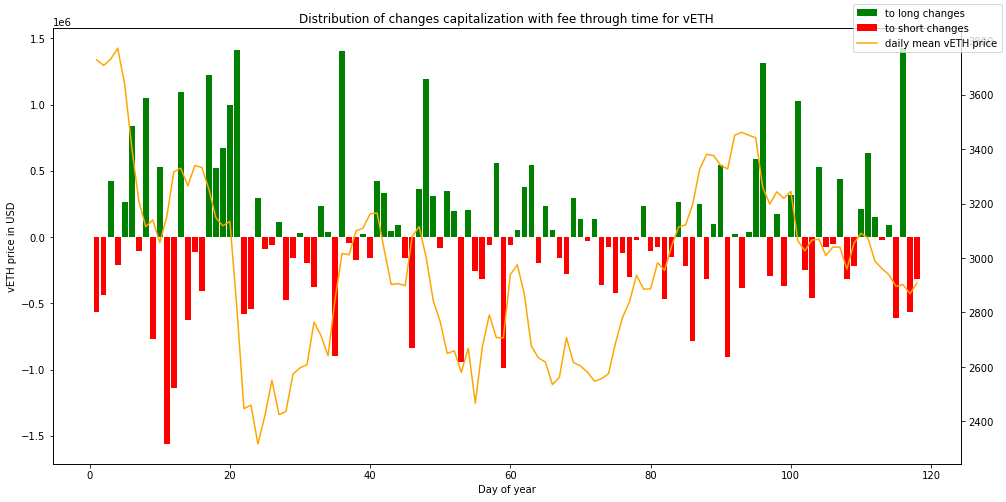

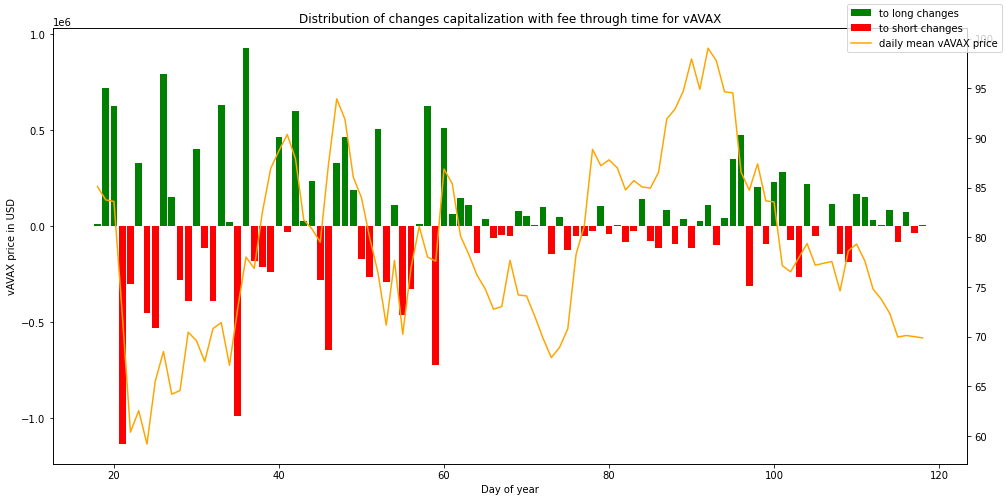

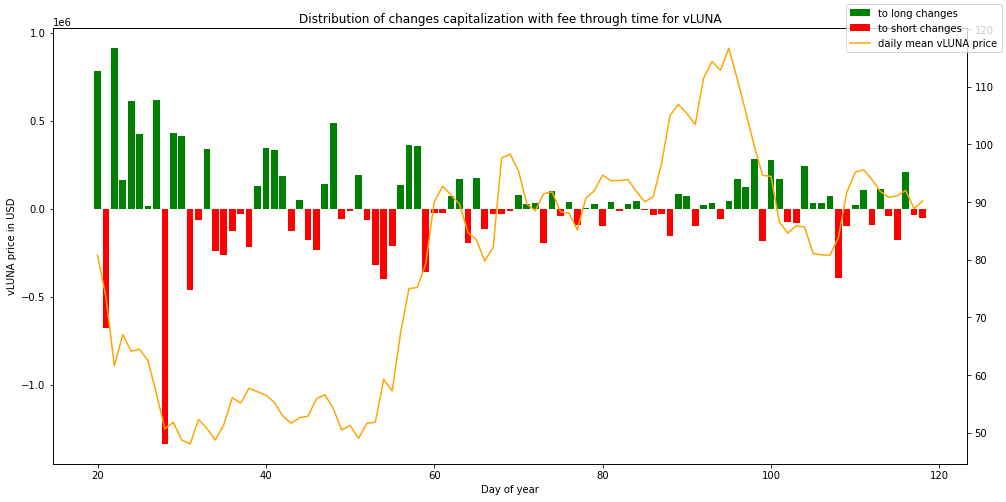

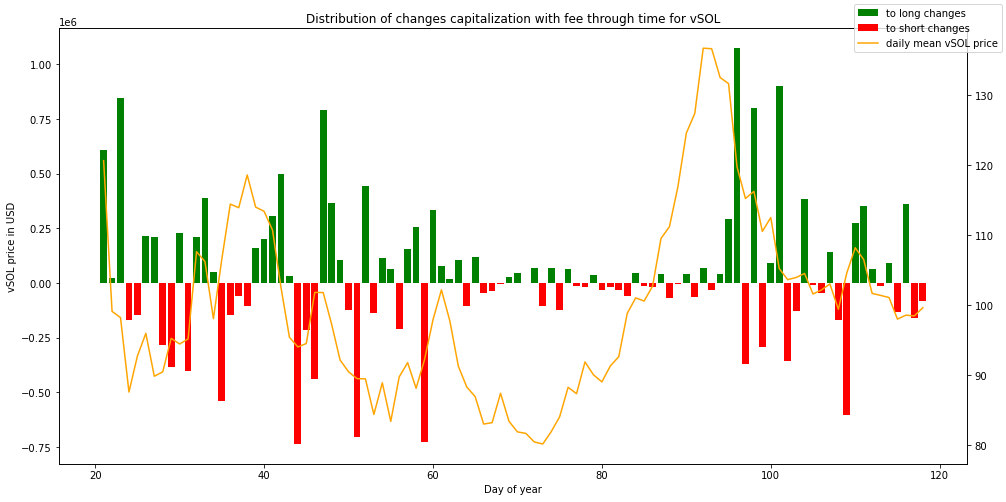

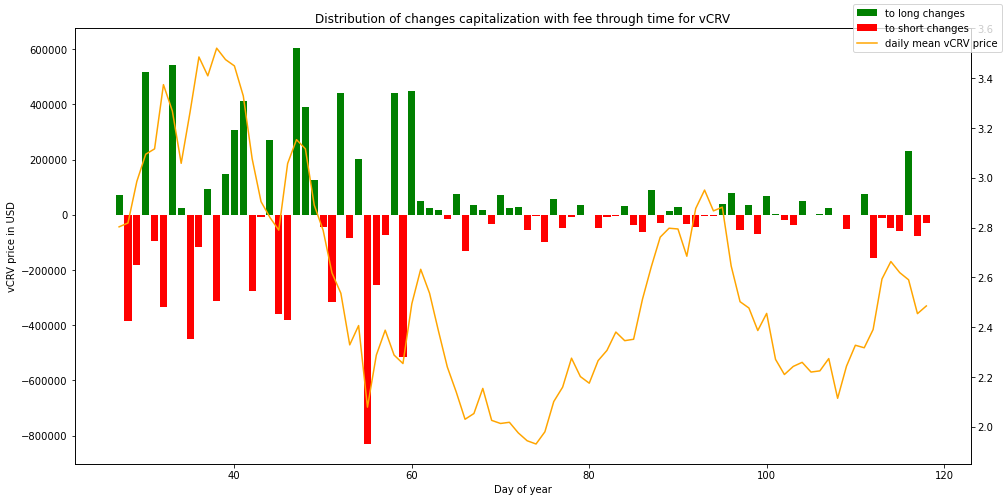

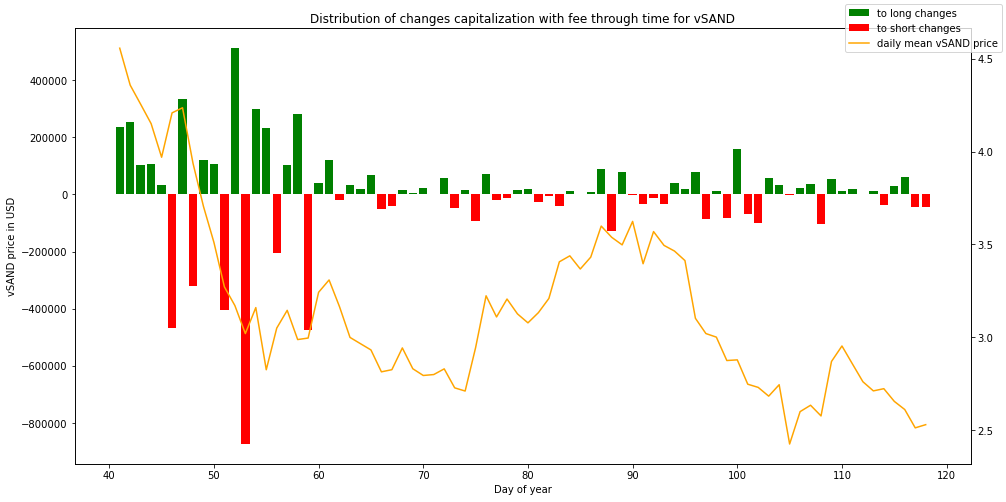

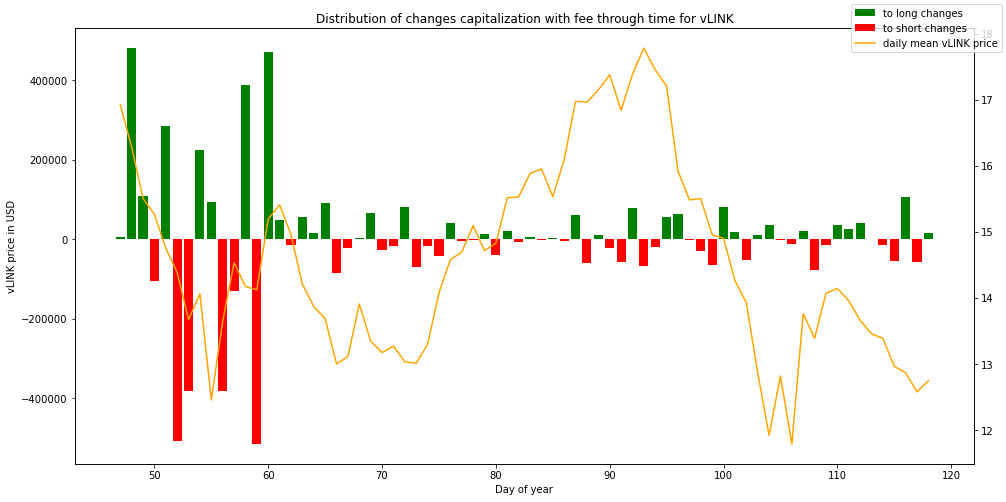

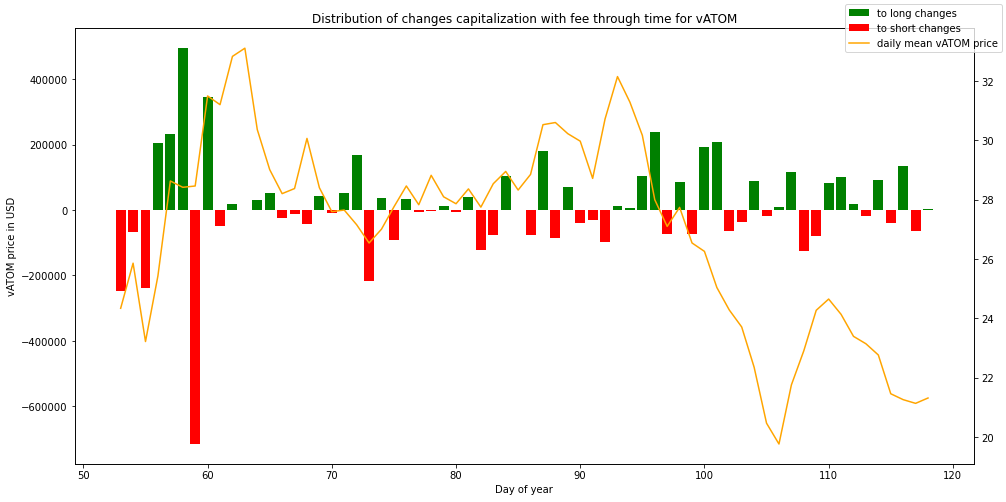

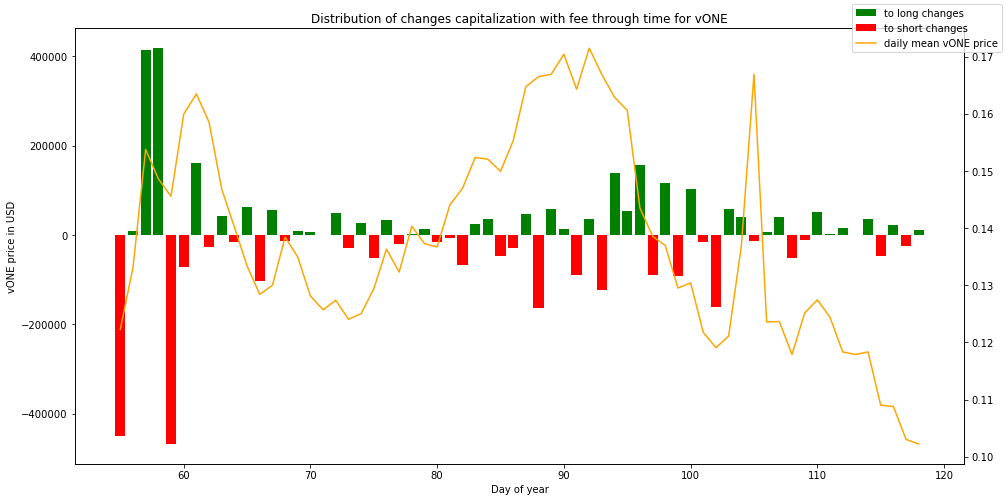

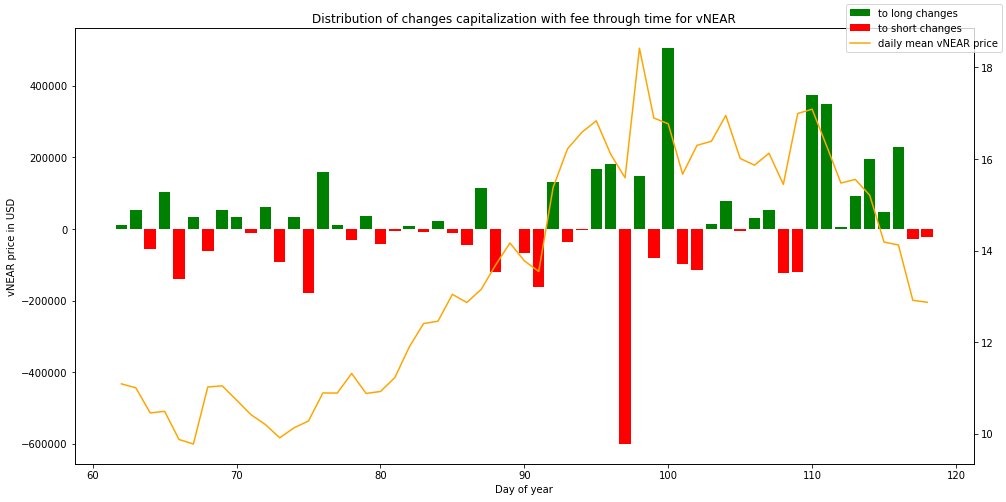

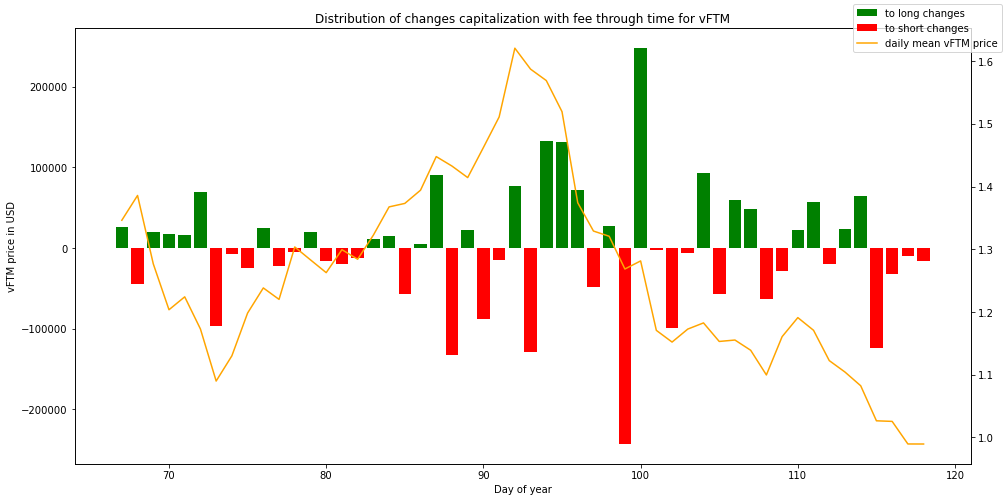

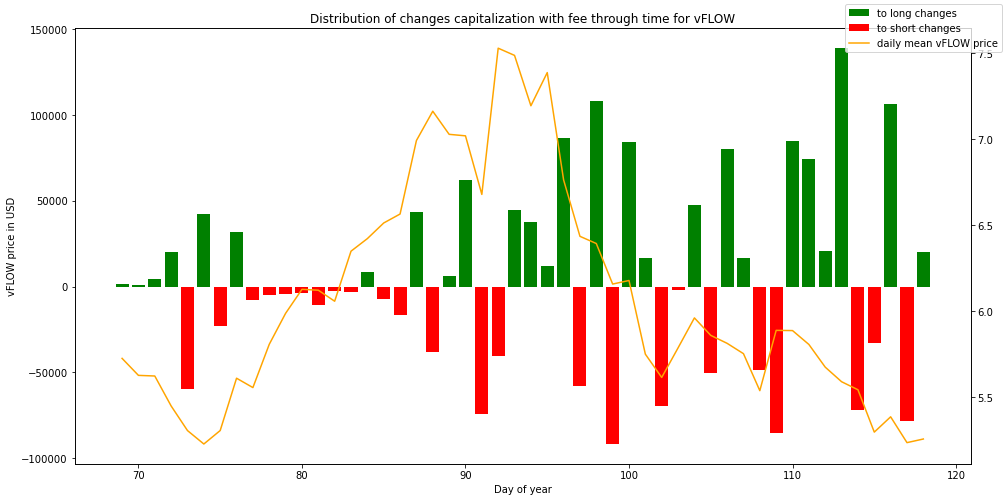

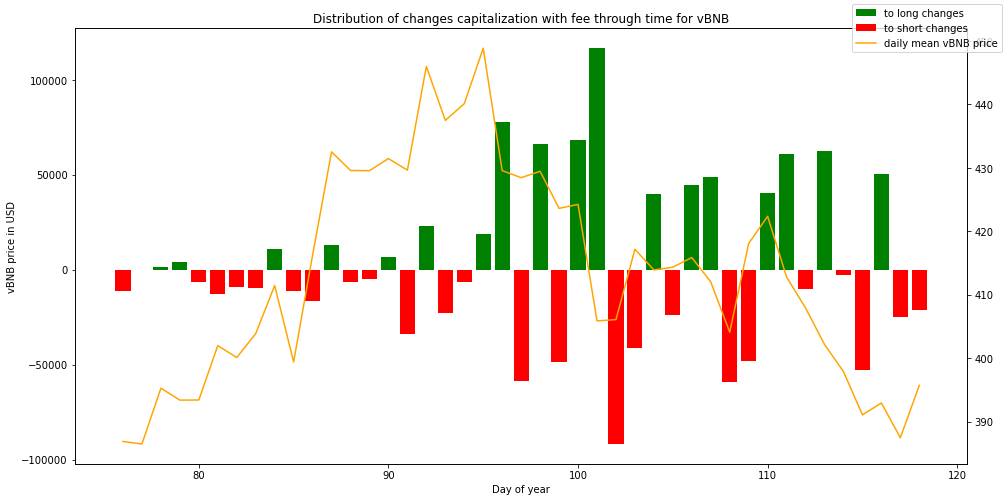

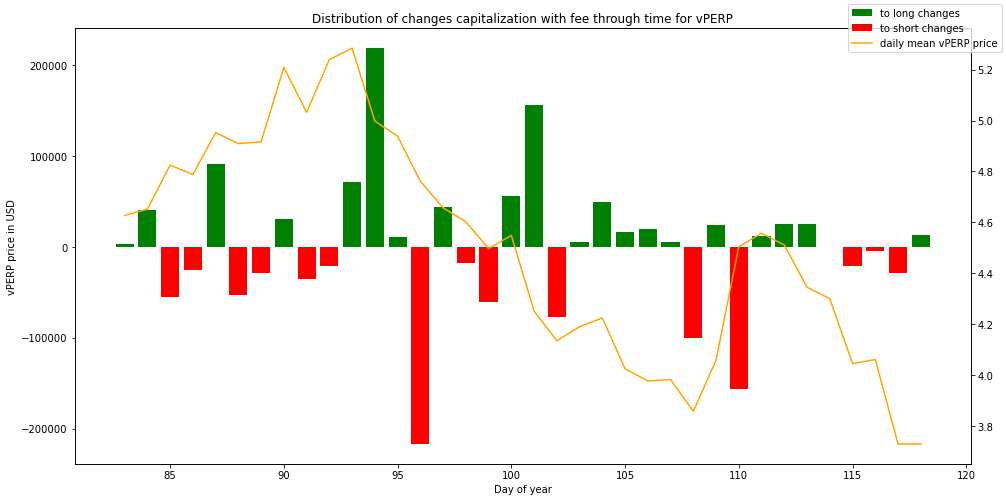

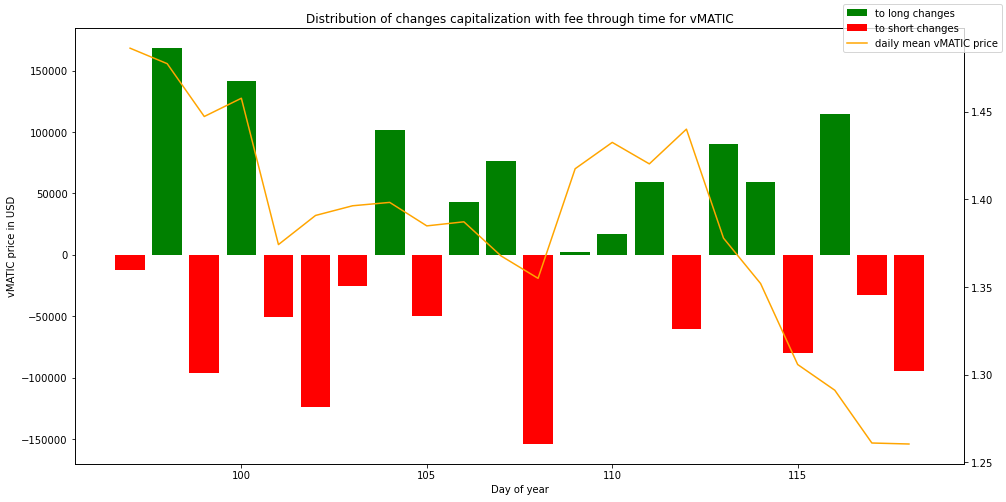

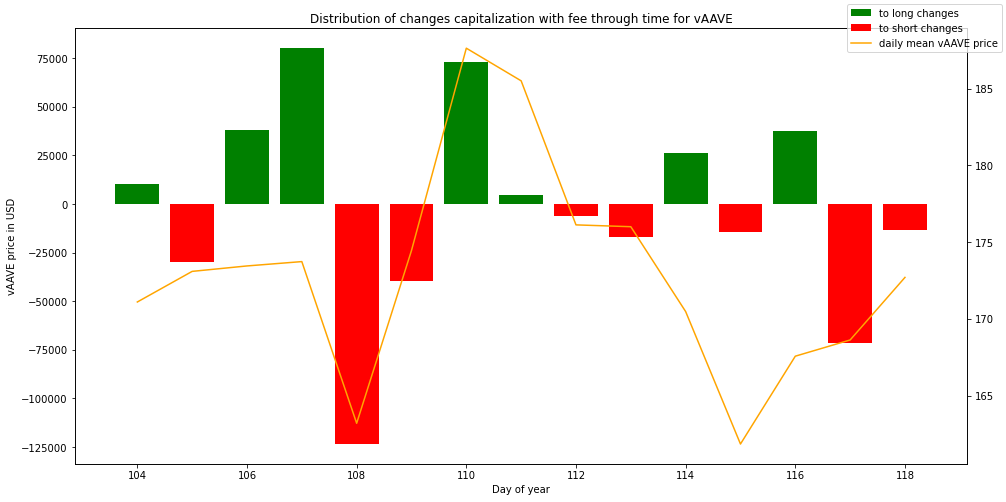

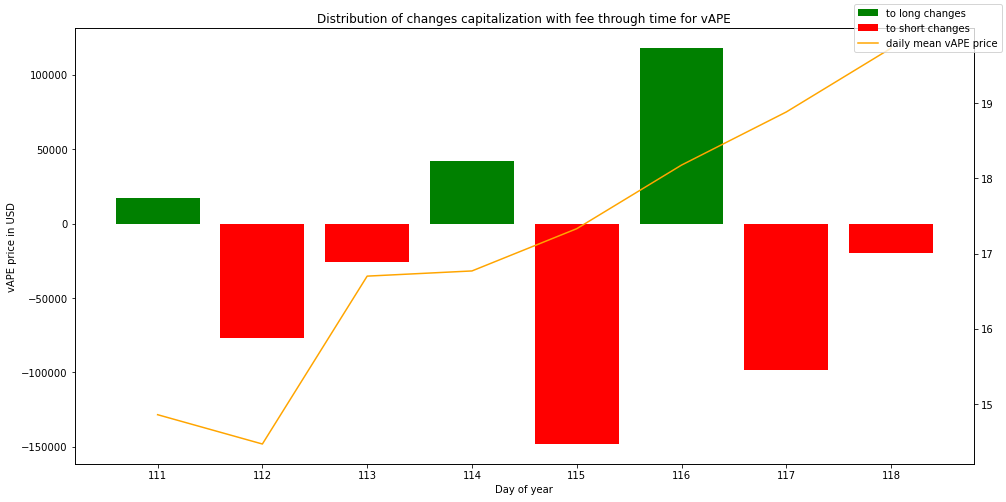

In [34]:
for pool in position_changes_df["pool_name"].unique():
    pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
    daily_pool_position_changes = pool_position_changes_df[["exchanged_position_notional", "fee", "realized_pnl", "day_of_year"]
                                                           ].groupby("day_of_year").sum()
    daily_pool_mean_swap_price_df = pool_position_changes_df[["day_of_year", "swapped_price"]].groupby("day_of_year").mean()
    fig, ax = plt.subplots(figsize=(14, 7))

    ax2 = ax.twinx()
    ax.bar(daily_pool_position_changes[(daily_pool_position_changes.index < 200) &
                                            (daily_pool_position_changes["exchanged_position_notional"] > 0)].index, 
            daily_pool_position_changes[(daily_pool_position_changes.index < 200) &
                                            (daily_pool_position_changes["exchanged_position_notional"] > 0)]["exchanged_position_notional"],
            color='g', label='to long changes')
    ax.bar(daily_pool_position_changes[(daily_pool_position_changes.index < 200) &
                                            (daily_pool_position_changes["exchanged_position_notional"] < 0)].index, 
            daily_pool_position_changes[(daily_pool_position_changes.index < 200) &
                                            (daily_pool_position_changes["exchanged_position_notional"] < 0)]["exchanged_position_notional"],
            color='r', label='to short changes')
    ax2.plot(daily_pool_mean_swap_price_df[daily_pool_mean_swap_price_df.index < 200].index,
            daily_pool_mean_swap_price_df[daily_pool_mean_swap_price_df.index < 200]["swapped_price"],
            color='orange', label='daily mean ' + pool + ' price')
    ax.set_xlabel("Day of year")
    ax.set_ylabel("Capitalization of changes in USD")
    ax.set_ylabel(pool + " price in USD")
    fig.legend()
    ax.set_title("Distribution of changes capitalization with fee through time for " + pool)

    fig.tight_layout()
    plt.show()